In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
import os

In [2]:
df=pd.read_csv("/content/Armenian Market Car Prices.csv")
df

,Car Name,Year,Region,FuelType,Mileage,Price
0,Ford Transit,2002,Goris,Diesel,215000,12000
1,Ford Focus,2017,Ijevan,Gasoline,72000,11500
2,Opel Vectra,1998,Armavir,Gasoline,466000,4000
3,Mazda 6,2020,Nor Nork,Gasoline,100000,22000
4,Opel Vectra,1998,Armavir,Gasoline,318000,3500
...,...,...,...,...,...,...
7990,VAZ (Lada) 2121 (4x4),2013,Armavir,Gasoline,150000,35000
7991,Toyota 4Runner,2018,Nor Nork,Gasoline,94000,5600
7992,Opel Astra hatchback,2001,Ajapnyak,Gasoline,151000,9800
7993,Toyota Camry,2009,Shengavit,Gasoline,300000,4500


In [3]:
# check duplicate
df.duplicated().sum()

9

In [4]:
# show data duplicated
df[df.duplicated()]
#After analyzing the data, we observed that Germany is duplicated in the Region column.
#Therefore, we will not remove these entries, as the other columns contain different data.

,Car Name,Year,Region,FuelType,Mileage,Price
7296,BMW X5,2024,Germany,Diesel,10,40000
7345,BMW iX1,2024,Germany,Electric,10,35000
7346,BMW iX1,2024,Germany,Electric,10,35000
7347,BMW iX1,2024,Germany,Electric,10,35000
7376,Mercedes-Benz EQE AMG,2023,Germany,Electric,10,35000
7433,BMW iX1,2023,Germany,Electric,12000,32000
7497,Mercedes-Benz EQB,2023,Germany,Electric,6900,25000
7508,Mercedes-Benz EQA,2023,Germany,Electric,10,25000
7509,Mercedes-Benz EQA,2023,Germany,Electric,10,25000


In [5]:
#check null value
df.isnull().sum()

Car Name    0
Year        0
Region      0
FuelType    0
Mileage     0
Price       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7995 entries, 0 to 7994
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Car Name  7995 non-null   object
 1   Year      7995 non-null   int64 
 2   Region    7995 non-null   object
 3   FuelType  7995 non-null   object
 4   Mileage   7995 non-null   int64 
 5   Price     7995 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 374.9+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7995.0,2010.342089,9.113848,1943.0,2004.0,2011.0,2018.0,2024.0
Mileage,7995.0,146401.523327,108371.306576,10.0,60000.0,130000.0,210000.0,1000000.0
Price,7995.0,15555.002877,17731.598604,200.0,6000.0,11500.0,19000.0,565000.0


In [8]:
df.shape

(7995, 6)

In [9]:
df

,Car Name,Year,Region,FuelType,Mileage,Price
0,Ford Transit,2002,Goris,Diesel,215000,12000
1,Ford Focus,2017,Ijevan,Gasoline,72000,11500
2,Opel Vectra,1998,Armavir,Gasoline,466000,4000
3,Mazda 6,2020,Nor Nork,Gasoline,100000,22000
4,Opel Vectra,1998,Armavir,Gasoline,318000,3500
...,...,...,...,...,...,...
7990,VAZ (Lada) 2121 (4x4),2013,Armavir,Gasoline,150000,35000
7991,Toyota 4Runner,2018,Nor Nork,Gasoline,94000,5600
7992,Opel Astra hatchback,2001,Ajapnyak,Gasoline,151000,9800
7993,Toyota Camry,2009,Shengavit,Gasoline,300000,4500


In [10]:
fuel_type=df["FuelType"].value_counts()
fuel_type

FuelType
Gasoline    7326
Electric     229
Diesel       226
Hybrid       214
Name: count, dtype: int64

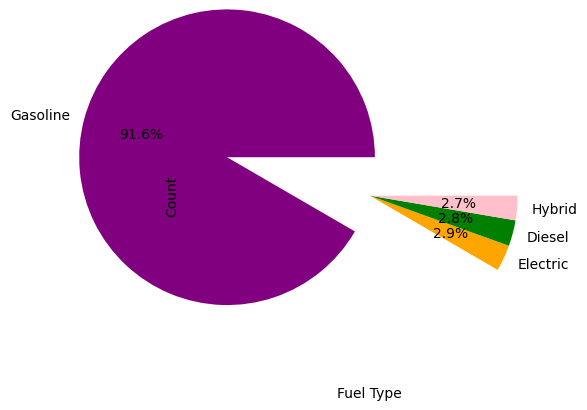

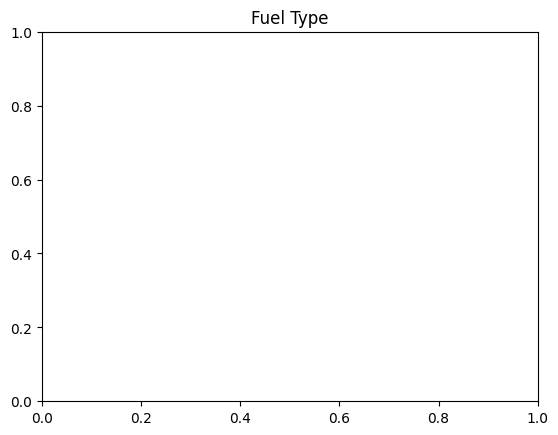

In [69]:
fuel_type.plot(kind="pie", colors=["purple", "orange", "green", "pink"], autopct="%1.1f%%", explode=(1, 0, 0, 0))
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()
plt.title("Fuel Type")
plt.show()


In [12]:
df[['make','model']] = df['Car Name'].str.split(' ',n=1, expand=True)
df.head()

,Car Name,Year,Region,FuelType,Mileage,Price,make,model
0,Ford Transit,2002,Goris,Diesel,215000,12000,Ford,Transit
1,Ford Focus,2017,Ijevan,Gasoline,72000,11500,Ford,Focus
2,Opel Vectra,1998,Armavir,Gasoline,466000,4000,Opel,Vectra
3,Mazda 6,2020,Nor Nork,Gasoline,100000,22000,Mazda,6
4,Opel Vectra,1998,Armavir,Gasoline,318000,3500,Opel,Vectra


In [37]:
df_most_10_frequent_car_name=df['Car Name'].value_counts().head(10)
df_most_10_frequent_car_name

Car Name
Toyota Camry             300
Mercedes-Benz C-Class    278
Mercedes-Benz E-Class    276
Hyundai Elantra          187
Opel Astra hatchback     175
BMW 3 Series             167
Kia Forte                158
BMW X5                   139
Nissan Rogue             130
Opel Zafira              123
Name: count, dtype: int64

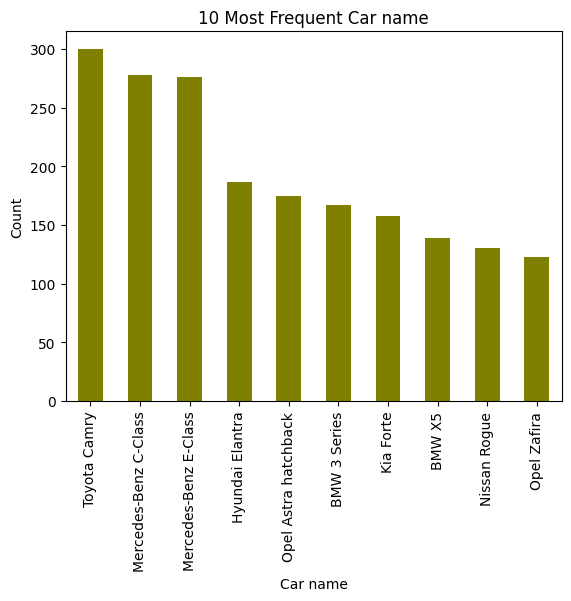

In [14]:
df_most_10_frequent_car_name.plot(kind="bar",color="olive")
plt.xlabel("Car name")
plt.ylabel("Count")
plt.title("10 Most Frequent Car name")
plt.show()


In [15]:
# Extract mileage data for these car name
mileage_data = df[df['Car Name'].isin(df_most_10_frequent_car_name.index)]
mileage_data

,Car Name,Year,Region,FuelType,Mileage,Price,make,model
7,Mercedes-Benz E-Class,2001,Vedi,Gasoline,219779,7200,Mercedes-Benz,E-Class
11,Opel Zafira,2002,Malatia-Sebastia,Gasoline,197900,6300,Opel,Zafira
13,Mercedes-Benz E-Class,1996,Gyumri,Gasoline,468000,3000,Mercedes-Benz,E-Class
30,Mercedes-Benz C-Class,2001,On the way,Gasoline,147000,7000,Mercedes-Benz,C-Class
33,Toyota Camry,2020,Avan,Gasoline,98000,22500,Toyota,Camry
...,...,...,...,...,...,...,...,...
7984,Mercedes-Benz C-Class,2013,Erebuni,Gasoline,190000,4450,Mercedes-Benz,C-Class
7985,Mercedes-Benz C-Class,2000,Alaverdi,Gasoline,210000,4350,Mercedes-Benz,C-Class
7992,Opel Astra hatchback,2001,Ajapnyak,Gasoline,151000,9800,Opel,Astra hatchback
7993,Toyota Camry,2009,Shengavit,Gasoline,300000,4500,Toyota,Camry


In [16]:
# Group by car make and calculate average mileage
average_mileage = mileage_data.groupby('Car Name')['Mileage'].mean().sort_values(ascending=False)
average_mileage

Car Name
Opel Zafira              272023.926829
Opel Astra hatchback     261652.508571
Mercedes-Benz C-Class    250410.697842
Mercedes-Benz E-Class    231253.771739
BMW 3 Series             182202.730539
BMW X5                   178471.410072
Toyota Camry             113064.983333
Hyundai Elantra           86233.903743
Nissan Rogue              78617.376923
Kia Forte                 67773.670886
Name: Mileage, dtype: float64

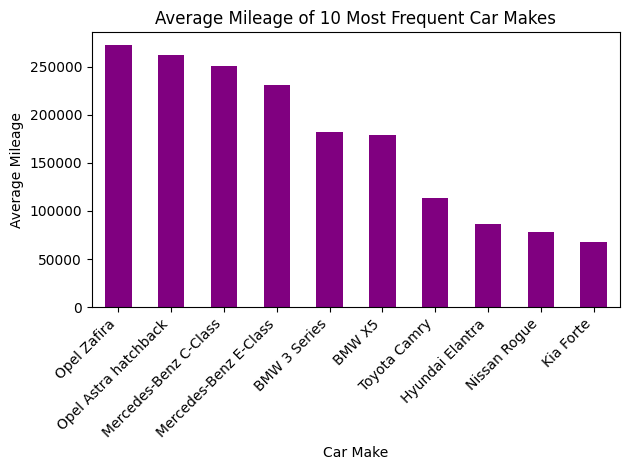

In [70]:
# Plot the results
average_mileage.plot(kind="bar",color="purple")
plt.xlabel("Car Make")
plt.ylabel("Average Mileage")
plt.title("Average Mileage of 10 Most Frequent Car Makes")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [18]:
#sort the dataframe by price and select only 'Car Name' and 'Price' columns
sorted_10_expensive_car=df.sort_values('Price',ascending=False).head(10)[['Car Name','Price']]
sorted_10_expensive_car

,Car Name,Price
7245,Jeep Cherokee,565000
7957,VAZ (Lada) 2114 hatchback,460000
6689,Toyota Camry,350000
7958,Rolls-Royce Cullinan,310000
6687,Jeep Compass,190000
1650,BMW 6 Series coupe,185000
4151,Nissan Tiida hatchback,180000
3079,Ford Fusion (North America),175000
2227,Toyota Camry,173000
2991,VAZ (Lada) 2121 (4x4),150000


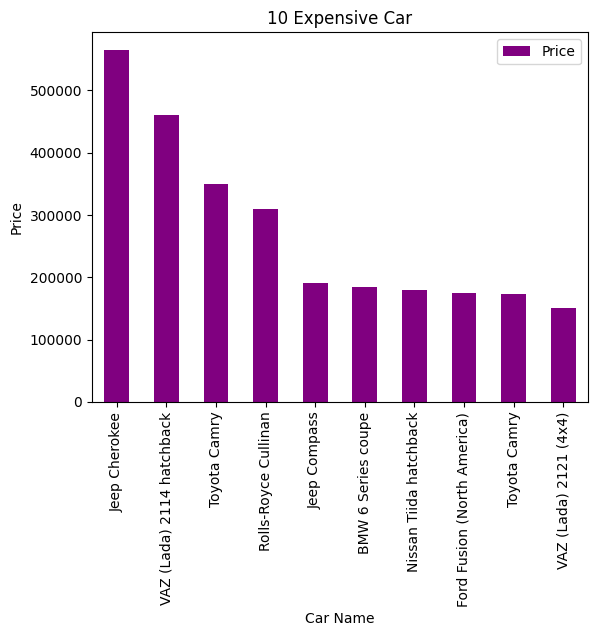

In [71]:
sorted_10_expensive_car.plot(kind="bar",x="Car Name",color="purple")
plt.xlabel("Car Name")
plt.ylabel("Price")
plt.title("10 Expensive Car")
plt.show()

In [20]:
# Sort the DataFrame by 'Price' and select only 'Car Name' and 'Price' columns
sorted_10_cheapest_car = df.sort_values('Price').head(10)[['Car Name', 'Price']] # Changed 'price' to 'Price'

# Display the selected columns of the sorted DataFrame
sorted_10_cheapest_car

,Car Name,Price
280,GAZ (ГАЗ) 24 Volga,200
197,Ford Mondeo,200
1997,Mazda 6,200
200,GAZ (ГАЗ) 31105 Volga,250
3496,VAZ (Lada) 2107,400
968,Toyota Camry,500
2511,Opel Vectra wagon,500
818,Hyundai Sonata,500
4809,Toyota RAV4,500
176,GAZ (ГАЗ) 31105 Volga,550


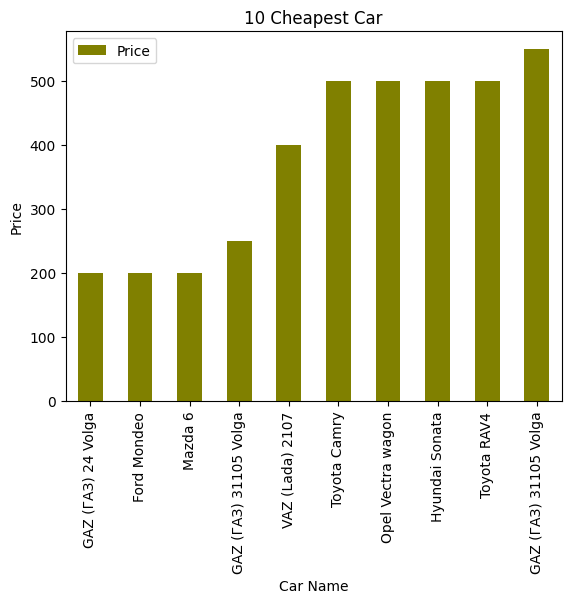

In [21]:
sorted_10_cheapest_car.plot(kind="bar",x="Car Name",color="olive")
plt.xlabel("Car Name")
plt.ylabel("Price")

plt.title("10 Cheapest Car")
plt.show()

In [22]:
#showing the most frequent car make into region
df['Region'].unique()
the_5_top_country_maker=df.groupby('Region').value_counts().head(5)
the_5_top_country_maker

Region   Car Name                      Year  FuelType  Mileage  Price  make   model                  
Abovian  BMW 3 Series                  1993  Gasoline  54900    21500  BMW    3 Series                   1
         Jeep Renegade                 2020  Gasoline  70000    5800   Jeep   Renegade                   1
         Lexus ES                      2021  Gasoline  27000    5500   Lexus  ES                         1
                                       2013  Gasoline  130000   7000   Lexus  ES                         1
         Land Rover Range Rover Sport  2007  Gasoline  150000   10000  Land   Rover Range Rover Sport    1
Name: count, dtype: int64

In [23]:

# Assuming 'df' is your DataFrame, 'make' is the manufacturer column,
# 'country' is the country of origin column, and 'Year' is the year column
df_2022 = df[df['Year']== 2022]  # Filter data for year 2022
top_5_makers_2022 = df_2022.groupby('Region')['make'].value_counts().groupby(level=0).head(5)
top_5_makers_2022

Region     make   
Abovian    Honda      1
           Lexus      1
Ajapnyak   Kia        3
           Lexus      2
           Toyota     2
                     ..
Shengavit  Hyundai    1
           Kia        1
Vanadzor   Jeep       1
           Subaru     1
Vedi       Kia        1
Name: count, Length: 93, dtype: int64

In [24]:
#The higest region was made many make car
The_higest_region_makes_car=df['Region'].value_counts().head(10)
The_higest_region_makes_car

Region
Kentron             802
Malatia-Sebastia    568
Erebuni             505
Shengavit           505
Arabkir             494
Nor Nork            490
Ajapnyak            471
Gyumri              290
Davtashen           281
Avan                271
Name: count, dtype: int64

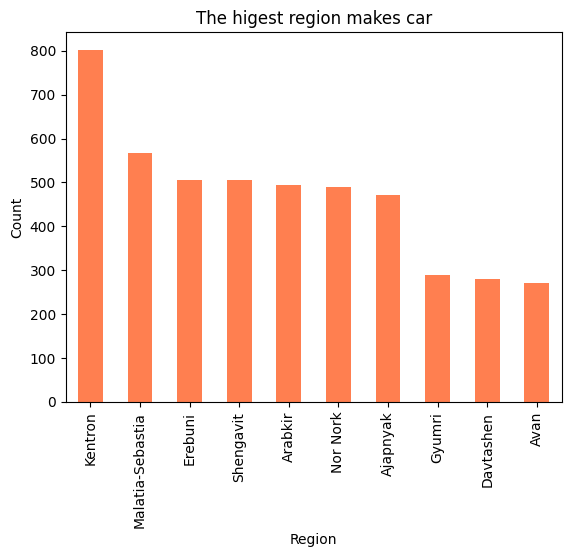

In [25]:
The_higest_region_makes_car.plot(kind="bar",color="coral")
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("The higest region makes car")
plt.show()

In [26]:
#showing top 5 cars make has many model
# Group by 'make' and count the number of unique models for each make
top_5_makes_with_most_models = df.groupby('make')['model'].nunique().sort_values(ascending=False).head(5)
top_5_makes_with_most_models

make
Mercedes-Benz    79
Nissan           45
BMW              44
Toyota           39
VAZ              32
Name: model, dtype: int64

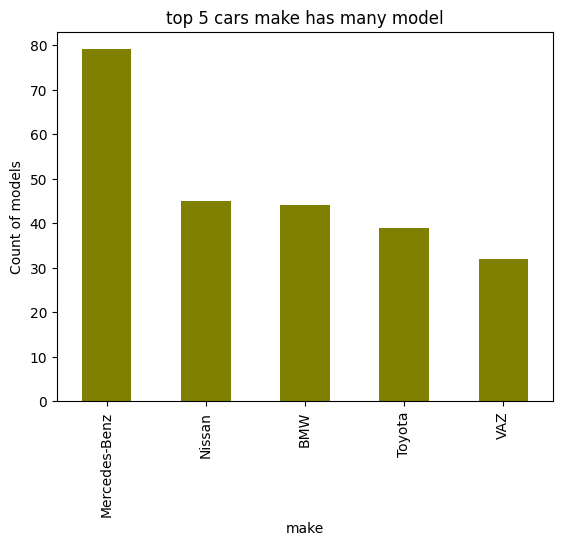

In [27]:
top_5_makes_with_most_models.plot(kind="bar",color="olive")
plt.xlabel("make")
plt.ylabel("Count of models")
plt.title("top 5 cars make has many model")
plt.show()

In [54]:
# compare with the lowest frequency car in data & its price
least_frequent_cars = df["Car Name"].value_counts().tail(10).index.sort_values(ascending=True)
least_frequent_cars


Index(['Alfa Romeo 159 wagon', 'FAW Oley', 'Hyundai IONIQ 5',
       'Mercedes-Benz GLC-Class coupe', 'Mitsubishi Mirage',
       'Moskvich (Москвич) 400', 'Nissan Presea', 'Suzuki Baleno hatchback',
       'Suzuki Swift', 'Volkswagen e-Bora'],
      dtype='object', name='Car Name')

In [60]:
least_frequent_cars_df = df[df['Car Name'].isin(least_frequent_cars)][['Car Name', 'Price']].sort_values(by='Price', ascending=True)
least_frequent_cars_df


,Car Name,Price
775,Mitsubishi Mirage,3700
7978,Moskvich (Москвич) 400,4700
3566,Suzuki Baleno hatchback,5000
3505,Alfa Romeo 159 wagon,5800
3518,Hyundai IONIQ 5,9000
758,Nissan Presea,9200
3567,Suzuki Swift,11500
3528,FAW Oley,17000
3636,Mercedes-Benz GLC-Class coupe,28600
3605,Volkswagen e-Bora,91000


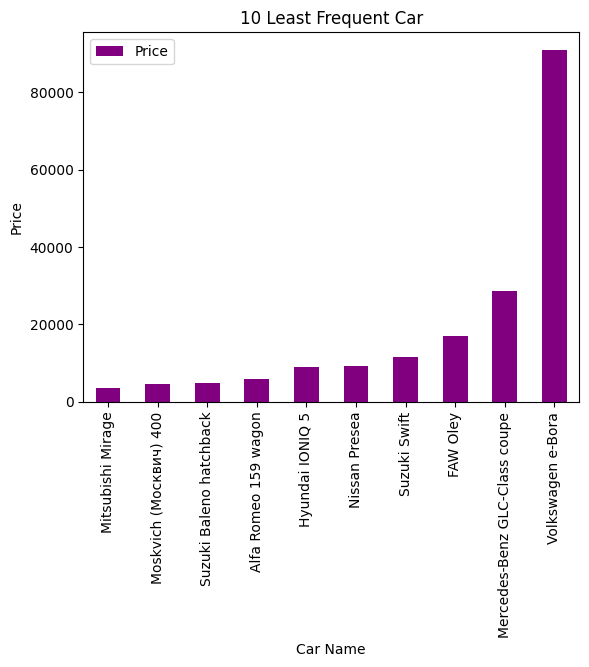

In [61]:
least_frequent_cars_df.plot(kind="bar",x="Car Name",color="purple")
plt.xlabel("Car Name")
plt.ylabel("Price")
plt.title("10 Least Frequent Car")
plt.show()